<a href="https://colab.research.google.com/github/deepanshu2118/stock-price-prediction/blob/main/stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
data1 = yf.download("F", start="2000-01-01", end="2024-12-31")    #F – Ford Motor Co.
# Founded: 1903 – Auto industry crashes, bailouts, EV transition added variance.

[*********************100%***********************]  1 of 1 completed


In [53]:
data1

Price,Close,High,Low,Open,Volume
Ticker,F,F,F,F,F
Date,,,,,
2000-01-03,11.945578,12.130891,11.888558,12.031107,4056814
2000-01-04,11.546442,11.917068,11.475167,11.817284,7322428
2000-01-05,11.589203,11.746006,11.574948,11.631968,5038354
2000-01-06,11.603461,11.817284,11.489422,11.631971,4545037
2000-01-07,12.458753,12.544282,11.888558,11.974087,9266037
...,...,...,...,...,...
2024-12-23,9.586708,9.606076,9.441455,9.557658,50646600
2024-12-24,9.702911,9.741646,9.577025,9.586708,29083100


In [54]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6288 entries, 2000-01-03 to 2024-12-30
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   (Close, F)   6288 non-null   float64
 1   (High, F)    6288 non-null   float64
 2   (Low, F)     6288 non-null   float64
 3   (Open, F)    6288 non-null   float64
 4   (Volume, F)  6288 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 294.8 KB


In [55]:
data1.columns[0]

('Close', 'F')

In [56]:
for i in range(len(data1.columns)):
  print(data1.columns[i][0])

Close
High
Low
Open
Volume


# change column name

In [57]:
data1.columns = [col[0] for col in data1.columns]      # we are change the column name

In [58]:
data1.head()

,Close,High,Low,Open,Volume
Date,,,,,
2000-01-03,11.945578,12.130891,11.888558,12.031107,4056814
2000-01-04,11.546442,11.917068,11.475167,11.817284,7322428
2000-01-05,11.589203,11.746006,11.574948,11.631968,5038354
2000-01-06,11.603461,11.817284,11.489422,11.631971,4545037
2000-01-07,12.458753,12.544282,11.888558,11.974087,9266037


In [59]:
data1.describe()

,Close,High,Low,Open,Volume
count,6288.000000,6288.000000,6288.000000,6288.000000,6.288000e+03
mean,7.441844,7.546410,7.339937,7.448007,4.350392e+07
std,2.820148,2.853999,2.782795,2.814857,3.700303e+07
min,0.674058,0.829198,0.540316,0.700807,1.024300e+06
25%,5.358517,5.445669,5.291461,5.365467,1.864192e+07
50%,7.328831,7.401697,7.242106,7.329271,3.697720e+07
75%,9.285963,9.390305,9.200734,9.303904,5.703168e+07
max,19.979618,20.518965,19.329230,19.725810,5.411756e+08


In [60]:
train =data1[:"2022"].iloc[:,3:4].values
test =data1["2023":].iloc[:,3:4].values

In [61]:
print(train.shape)
print(test.shape)

(5787, 1)
(501, 1)


In [62]:
train

array([[12.03110694],
       [11.81728447],
       [11.63196792],
       ...,
       [ 9.15659568],
       [ 9.07469357],
       [ 9.3367782 ]])

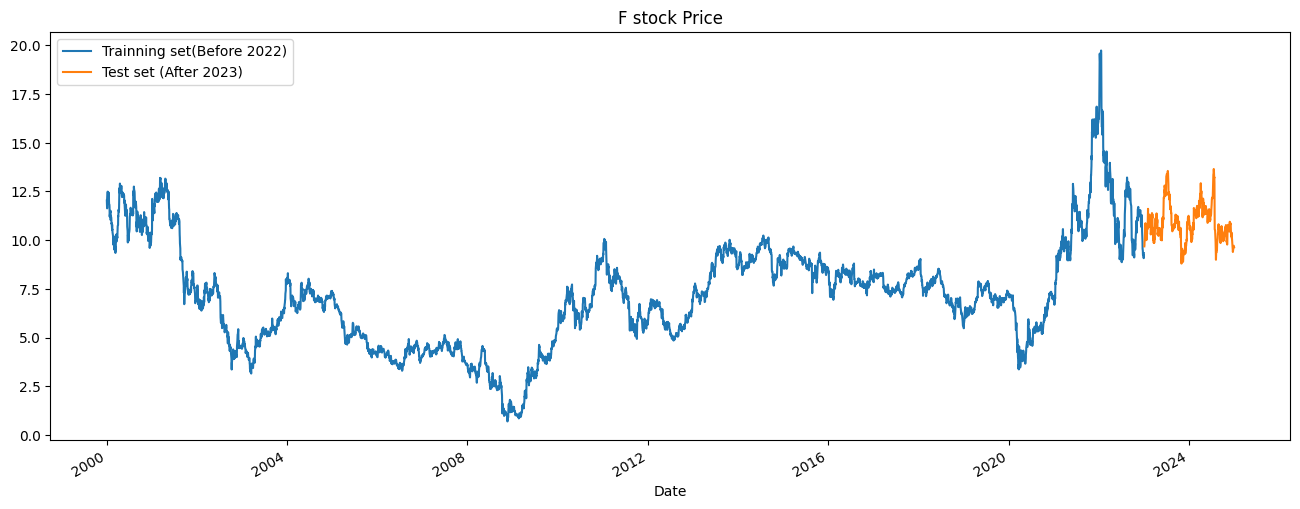

In [63]:
# visualization of the "Open" Atributes of the dataset

data1["Open"][:"2022"].plot(figsize=(16,6),legend=True)
data1["Open"]["2023":].plot(figsize=(16,6),legend=True)
plt.legend(["Trainning set(Before 2022)","Test set (After 2023)"])
plt.title("F stock Price")
plt.show()

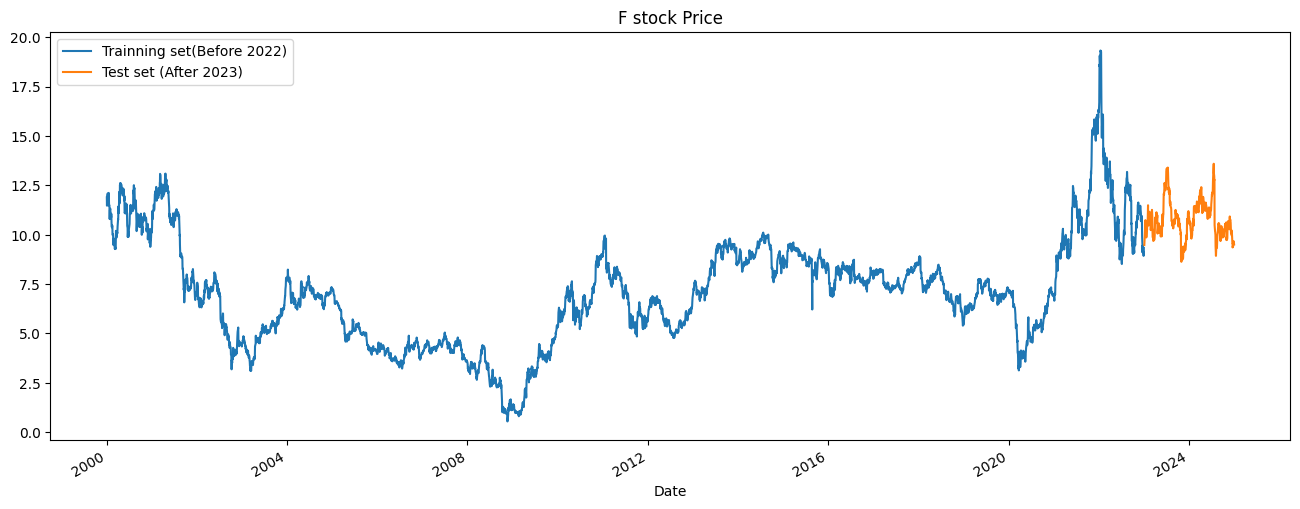

In [64]:
# visualization of the "Low" Atributes of the dataset

data1["Low"][:"2022"].plot(figsize=(16,6),legend=True)
data1["Low"]["2023":].plot(figsize=(16,6),legend=True)
plt.legend(["Trainning set(Before 2022)","Test set (After 2023)"])
plt.title("F stock Price")
plt.show()

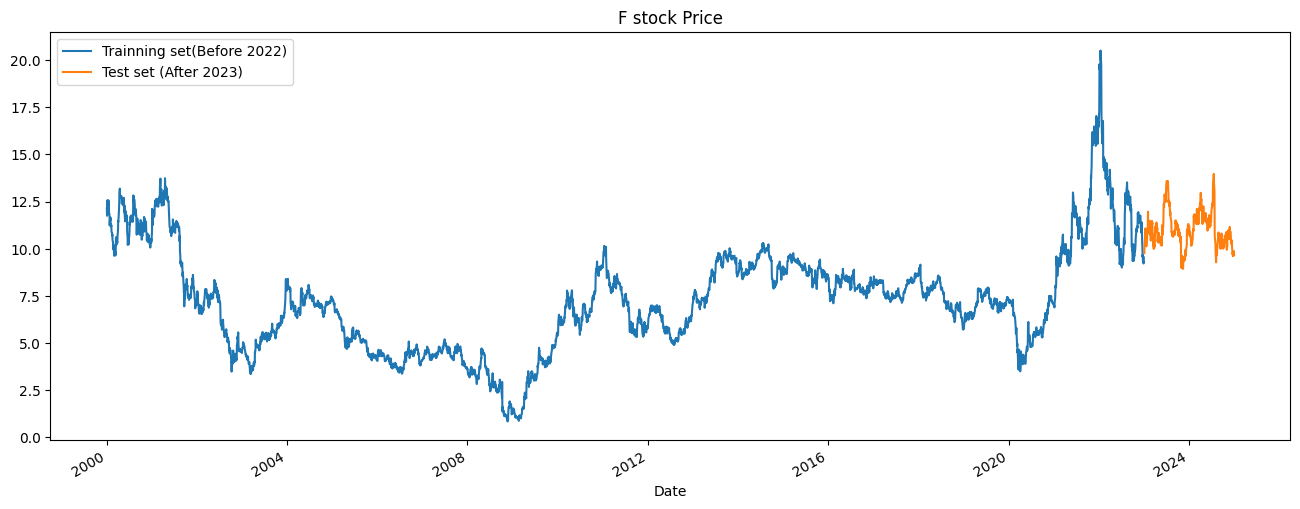

In [65]:
# visualization of the "High" Atributes of the dataset

data1["High"][:"2022"].plot(figsize=(16,6),legend=True)
data1["High"]["2023":].plot(figsize=(16,6),legend=True)
plt.legend(["Trainning set(Before 2022)","Test set (After 2023)"])
plt.title("F stock Price")
plt.show()

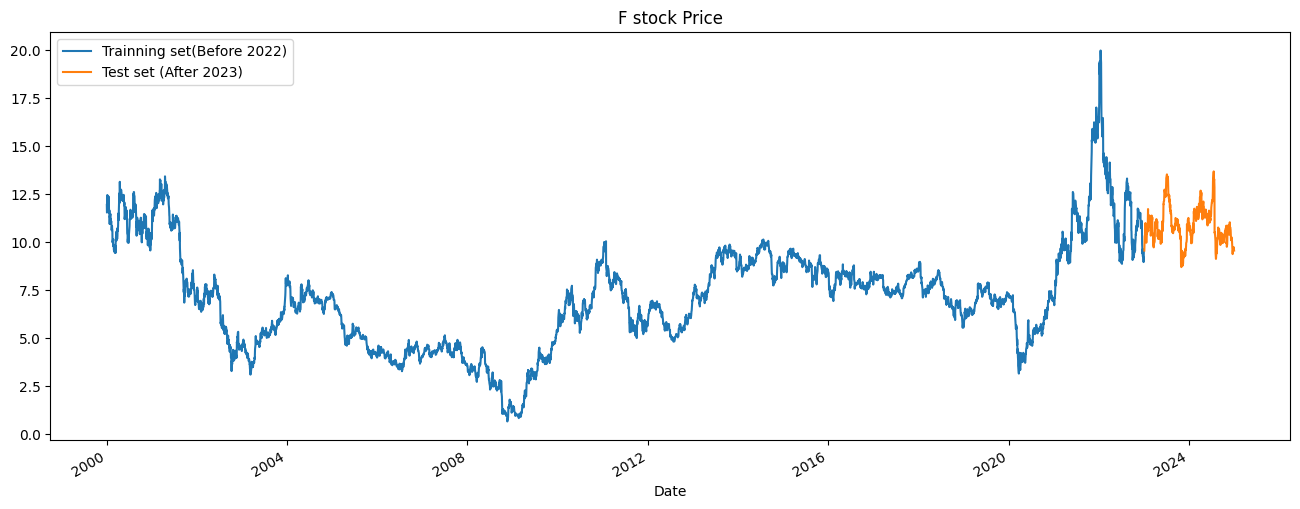

In [66]:
# visualization of the "Close" Atributes of the dataset

data1["Close"][:"2022"].plot(figsize=(16,6),legend=True)
data1["Close"]["2023":].plot(figsize=(16,6),legend=True)
plt.legend(["Trainning set(Before 2022)","Test set (After 2023)"])
plt.title("F stock Price")
plt.show()

#Open

In [67]:
ma100 = data1.Open.rolling(100).mean()
ma100

,Open
Date,
2000-01-03,NaN
2000-01-04,NaN
2000-01-05,NaN
2000-01-06,NaN
2000-01-07,NaN
...,...
2024-12-23,10.249282
2024-12-24,10.245903
2024-12-26,10.252806


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

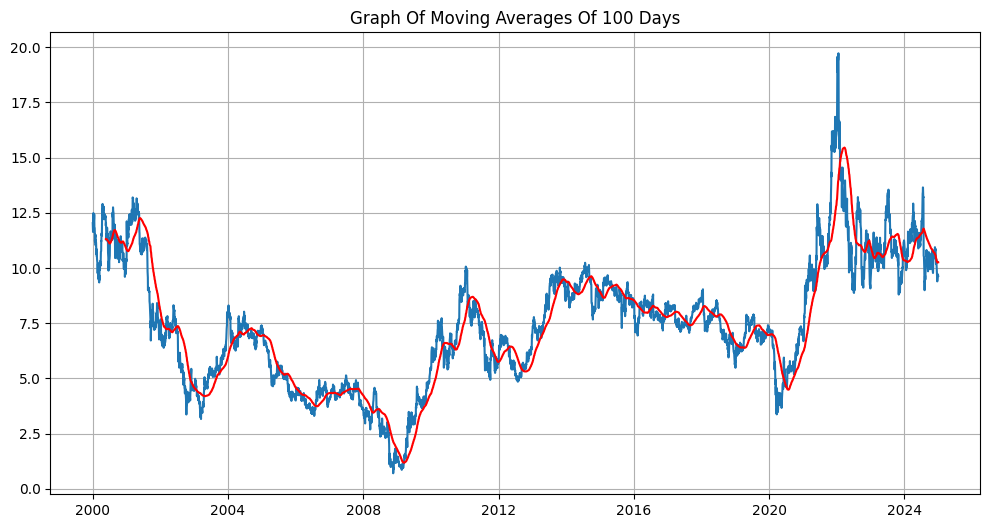

In [68]:
plt.figure(figsize = (12,6))
plt.plot(data1.Open)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

In [69]:
ma200=data1.Open.rolling(200).mean()
ma200

,Open
Date,
2000-01-03,NaN
2000-01-04,NaN
2000-01-05,NaN
2000-01-06,NaN
2000-01-07,NaN
...,...
2024-12-23,10.983765
2024-12-24,10.975328
2024-12-26,10.967329


Text(0.5, 1.0, 'Graph Of Moving Averages Of 200 Days')

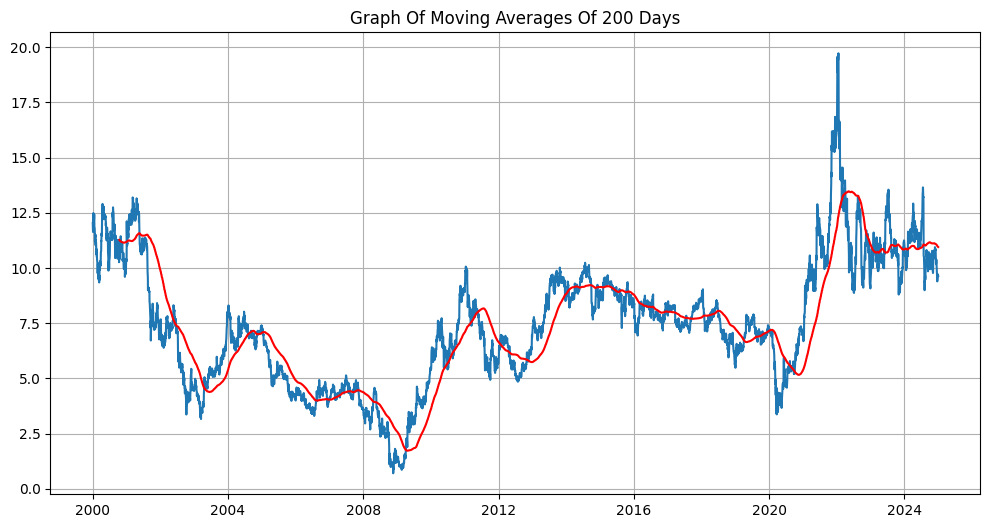

In [70]:
plt.figure(figsize = (12,6))
plt.plot(data1.Open)
plt.plot(ma200, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 200 Days')

In [72]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM, GRU, Bidirectional
from tensorflow.keras.models import Sequential
import tensorflow as tf


In [74]:
scaler=MinMaxScaler(feature_range=(0,1))

data_train=scaler.fit_transform(train)
data_train

array([[0.59554787],
       [0.58430885],
       [0.57456816],
       ...,
       [0.44445664],
       [0.44015167],
       [0.45392746]])

In [75]:
x_train = []
y_train = []

for i in range(100, data_train.shape[0]):
    x_train.append(data_train[i-100: i])
    y_train.append(data_train[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [76]:
x_train

array([[[0.59554787],
        [0.58430885],
        [0.57456816],
        ...,
        [0.6093182 ],
        [0.58946007],
        [0.59251499]],

       [[0.58430885],
        [0.57456816],
        [0.57456833],
        ...,
        [0.58946007],
        [0.59251499],
        [0.5963338 ]],

       [[0.57456816],
        [0.57456833],
        [0.59255078],
        ...,
        [0.59251499],
        [0.5963338 ],
        [0.58411365]],

       ...,

       [[0.60561686],
        [0.61995918],
        [0.62375573],
        ...,
        [0.45995439],
        [0.44833105],
        [0.44876155]],

       [[0.61995918],
        [0.62375573],
        [0.62224938],
        ...,
        [0.44833105],
        [0.44876155],
        [0.44445664]],

       [[0.62375573],
        [0.62224938],
        [0.63630867],
        ...,
        [0.44876155],
        [0.44445664],
        [0.44015167]]])

In [77]:
y_train

array([0.5963338 , 0.58411365, 0.56120019, ..., 0.44445664, 0.44015167,
       0.45392746])

In [78]:
print(x_train.shape)
print(y_train.shape)

(5687, 100, 1)
(5687,)


In [79]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 50, activation = 'relu', return_sequences=True))
model.add(Dropout(0.2))


model.add(LSTM(units = 50, activation = 'relu', return_sequences=True))
model.add(Dropout(0.2))


model.add(LSTM(units = 50, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [80]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,051 (277.54 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

In [81]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 50)

Epoch 1/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 44s 202ms/step - loss: 0.0240 - mean_absolute_error: 0.1059
Epoch 2/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 41s 205ms/step - loss: 0.0029 - mean_absolute_error: 0.0397
Epoch 3/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 39s 195ms/step - loss: 0.0027 - mean_absolute_error: 0.0379
Epoch 4/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 41s 197ms/step - loss: 0.0024 - mean_absolute_error: 0.0352
Epoch 5/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 42s 202ms/step - loss: 0.0018 - mean_absolute_error: 0.0312
Epoch 6/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 41s 200ms/step - loss: 0.0017 - mean_absolute_error: 0.0307
Epoch 7/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 42s 206ms/step - loss: 0.0017 - mean_absolute_error: 0.0296
Epoch 8/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 40s 200ms/step - loss: 0.0014 - mean_absolute_error: 0.0272
Epoch 9/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 36s 202ms/step - loss: 0.0014 - mean_absolute_error: 0.0274
Epoch 10/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 41s 201ms/step - loss: 0.0012 - mean_absolute_error: 0.0255

In [82]:
test.shape

(501, 1)

In [83]:
dataset_total=pd.concat((data1["Open"][ : "2022"],data1["Open"]["2022":]),axis=0)
print(dataset_total.shape)

inputs=dataset_total[len(dataset_total)-len(test)-100: ].values
print(inputs.shape)

inputs=inputs.reshape(-1,1)
print(inputs.shape)

inputs=scaler.transform(inputs)
print(inputs.shape)

(6539,)
(601,)
(601, 1)
(601, 1)


In [84]:
x_test=[]
y_test=[]

for i in range(100,601):
  x_test.append(inputs[i-100:i])
  y_test.append(inputs[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)
# x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
print(x_test.shape)
print(y_test.shape)

(501, 100, 1)
(501,)


In [85]:
y_pred = model.predict(x_test)


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 140ms/step


In [86]:
y_pred.shape

(501, 1)

In [87]:
print(y_pred)

[[0.45218256]
 [0.4566692 ]
 [0.46381277]
 [0.4724135 ]
 [0.48037797]
 [0.49034178]
 [0.50022256]
 [0.5097824 ]
 [0.5200602 ]
 [0.5227394 ]
 [0.5199429 ]
 [0.51632404]
 [0.5097882 ]
 [0.5018482 ]
 [0.49795902]
 [0.49950153]
 [0.50362056]
 [0.5105456 ]
 [0.51689035]
 [0.521981  ]
 [0.5286025 ]
 [0.5365464 ]
 [0.54887015]
 [0.5504046 ]
 [0.54457974]
 [0.5366154 ]
 [0.5329443 ]
 [0.53609   ]
 [0.5429438 ]
 [0.548126  ]
 [0.55323076]
 [0.5547998 ]
 [0.55335754]
 [0.55186146]
 [0.550275  ]
 [0.5440664 ]
 [0.5368995 ]
 [0.5269803 ]
 [0.51876587]
 [0.5155517 ]
 [0.51811427]
 [0.52393925]
 [0.5325581 ]
 [0.54403347]
 [0.5531817 ]
 [0.55631006]
 [0.5577366 ]
 [0.5526354 ]
 [0.5407796 ]
 [0.5293615 ]
 [0.51670516]
 [0.50532603]
 [0.4996947 ]
 [0.49567354]
 [0.49299598]
 [0.4942613 ]
 [0.4973103 ]
 [0.4969248 ]
 [0.49653828]
 [0.49632758]
 [0.49832496]
 [0.5051752 ]
 [0.51518685]
 [0.5258453 ]
 [0.5365468 ]
 [0.5426611 ]
 [0.5425753 ]
 [0.536866  ]
 [0.53574985]
 [0.5415318 ]
 [0.5461748 ]
 [0.54

In [88]:
print(y_test)

[0.47200812 0.47459131 0.48449261 0.48492307 0.51161368 0.50903086
 0.51979316 0.53442992 0.50687833 0.51032224 0.51376615 0.49224141
 0.48879754 0.50042084 0.50903083 0.50558682 0.52237606 0.51764062
 0.52323711 0.5395959  0.54519234 0.57317447 0.52495902 0.52969451
 0.52625058 0.5357214  0.5512192  0.55076529 0.54481604 0.55762981
 0.54664664 0.54573132 0.54985004 0.5452737  0.52330724 0.52696836
 0.50408665 0.51140885 0.51552752 0.52834128 0.52971418 0.54527362
 0.56174853 0.55534158 0.54801951 0.55900271 0.53200241 0.50912066
 0.52193436 0.48944234 0.49081532 0.49859502 0.48166267 0.48486601
 0.50134085 0.49630691 0.48120497 0.49539159 0.49173057 0.50225617
 0.52513782 0.53108706 0.53657855 0.54756191 0.53886678 0.53154462
 0.52147677 0.54847711 0.56083323 0.54161265 0.5329176  0.53520566
 0.5443584  0.53978215 0.50362908 0.50774774 0.50729006 0.51779279
 0.50991592 0.50111218 0.50018555 0.51964627 0.52149968 0.50713582
 0.50991591 0.50945251 0.52010962 0.514086   0.5201096  0.5113

In [89]:
scaler.scale_

array([0.05256241])

In [90]:
scale_factor = 1/0.05256241
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

In [91]:
print(y_test)

[ 8.97995584  9.02910095  9.21747338  9.22566279  9.73345169  9.68431354
  9.88906635 10.16753079  9.64336159  9.70888199  9.77440243  9.36489429
  9.29937459  9.52050789  9.68431293  9.61879063  9.93820611  9.84811432
  9.95458754 10.26581356 10.37228585 10.90464583  9.98734684 10.07743953
 10.01191871 10.19210122 10.4869468  10.47831119 10.36512679 10.60890864
 10.39995391 10.38253983 10.4608986  10.37383373  9.95592177 10.02557447
  9.59024989  9.72955478  9.80791251 10.05169439 10.07781382 10.37383218
 10.68726733 10.5653751  10.4260728  10.63502813 10.12134739  9.68602195
  9.92980263  9.31164187  9.33776282  9.48577163  9.16363375  9.22457713
  9.53801118  9.4422403   9.15492586  9.42482644  9.35517549  9.555425
  9.99074845 10.10393284 10.20840844 10.41736683 10.25194202 10.11263792
  9.92109699 10.43477867 10.66985388 10.30418225 10.13875888 10.18228924
 10.35642021 10.26935686  9.58154463  9.65990217  9.6511948   9.85100938
  9.70115184  9.53366058  9.51603159  9.88627181  9.9

In [92]:
print(y_pred)

[[ 8.602775 ]
 [ 8.688133 ]
 [ 8.824039 ]
 [ 8.987669 ]
 [ 9.139193 ]
 [ 9.328754 ]
 [ 9.516736 ]
 [ 9.698611 ]
 [ 9.894147 ]
 [ 9.945119 ]
 [ 9.891915 ]
 [ 9.823067 ]
 [ 9.698723 ]
 [ 9.547664 ]
 [ 9.473672 ]
 [ 9.503018 ]
 [ 9.581383 ]
 [ 9.713132 ]
 [ 9.83384  ]
 [ 9.930691 ]
 [10.056664 ]
 [10.207797 ]
 [10.442256 ]
 [10.47145  ]
 [10.360632 ]
 [10.209109 ]
 [10.139268 ]
 [10.199115 ]
 [10.329507 ]
 [10.428099 ]
 [10.525217 ]
 [10.555068 ]
 [10.527629 ]
 [10.4991665]
 [10.468985 ]
 [10.350865 ]
 [10.214515 ]
 [10.025802 ]
 [ 9.869522 ]
 [ 9.8083725]
 [ 9.857125 ]
 [ 9.967946 ]
 [10.131919 ]
 [10.350239 ]
 [10.524284 ]
 [10.5838   ]
 [10.61094  ]
 [10.51389  ]
 [10.288334 ]
 [10.071104 ]
 [ 9.8303175]
 [ 9.61383  ]
 [ 9.506694 ]
 [ 9.430191 ]
 [ 9.379251 ]
 [ 9.403323 ]
 [ 9.46133  ]
 [ 9.453996 ]
 [ 9.446643 ]
 [ 9.442634 ]
 [ 9.480634 ]
 [ 9.610959 ]
 [ 9.801432 ]
 [10.004209 ]
 [10.207806 ]
 [10.324129 ]
 [10.322497 ]
 [10.213878 ]
 [10.192643 ]
 [10.302645 ]
 [10.390978 ]
 [10.3

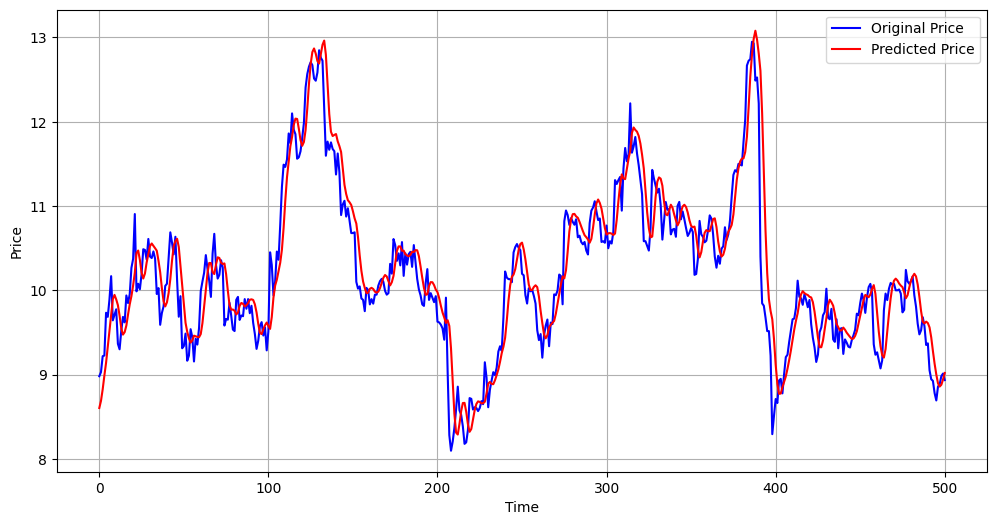

In [93]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [94]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.8461538871888261


In [95]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 2.59%


In [96]:
import math
from sklearn.metrics import mean_squared_error

In [97]:
def return_rmse(test,prediction):
  rmse=math.sqrt(mean_squared_error(test,prediction))
  print("the root mean squared error is : {}.".format(rmse))


In [98]:
return_rmse(actual,predicted)

the root mean squared error is : 0.36488712561505393.


In [99]:
#Grus architecture

ModelGRU=Sequential()

ModelGRU.add(GRU(units=50,return_sequences=True,input_shape=(x_train.shape[1],1),activation="tanh"))
ModelGRU.add(Dropout(0.2))

ModelGRU.add(GRU(units=50,return_sequences=True,input_shape=(x_train.shape[1],1),activation="tanh"))
ModelGRU.add(Dropout(0.2))

ModelGRU.add(GRU(units=50,return_sequences=True,input_shape=(x_train.shape[1],1),activation="tanh"))
ModelGRU.add(Dropout(0.2))

ModelGRU.add(GRU(units=50,activation="tanh"))
ModelGRU.add(Dropout(0.2))

ModelGRU.add(Dense(units=1))




/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [100]:
ModelGRU.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_4 (GRU)                     │ (None, 100, 50)        │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_5 (GRU)                     │ (None, 100, 50)        │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_6 (GRU)                     │ (None, 100, 50)        │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_7 (GRU)                     │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,901 (210.55 KB)

 Trainable params: 53,901 (210.55 KB)

 Non-trainable params: 0 (0.00 B)

In [101]:
from keras.optimizers import SGD

In [102]:
ModelGRU.compile(optimizer=SGD(learning_rate=0.01, decay=1e-7, momentum=0.9, nesterov=False), loss='mean_squared_error')
ModelGRU.fit(x_train, y_train, epochs=50)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


178/178 ━━━━━━━━━━━━━━━━━━━━ 55s 262ms/step - loss: 0.0264
Epoch 2/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 80s 254ms/step - loss: 0.0013
Epoch 3/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 46s 260ms/step - loss: 0.0011
Epoch 4/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 81s 253ms/step - loss: 9.5772e-04
Epoch 5/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 83s 260ms/step - loss: 9.5129e-04
Epoch 6/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 82s 258ms/step - loss: 8.2764e-04
Epoch 7/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 83s 263ms/step - loss: 8.8200e-04
Epoch 8/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 82s 266ms/step - loss: 7.7531e-04
Epoch 9/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 80s 254ms/step - loss: 8.4646e-04
Epoch 10/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 83s 258ms/step - loss: 8.1930e-04
Epoch 11/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 45s 254ms/step - loss: 8.7109e-04
Epoch 12/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 82s 253ms/step - loss: 7.7284e-04
Epoch 13/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 84s 268ms/step - loss: 7.5479e-04
Epoch 14/50
178/178 ━━━━━━━━━━━━━━━━━━━━ 82s 268ms/step -

In [103]:
y_pred1=ModelGRU.predict(x_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step


In [104]:
y_pred1.shape

(501, 1)

In [105]:
y_test.shape

(501,)

In [106]:
scaler.scale_


array([0.05256241])

In [107]:
print(y_pred1)

[[0.46587825]
 [0.462726  ]
 [0.46232793]
 [0.46432206]
 [0.46784544]
 [0.4732378 ]
 [0.47983938]
 [0.48720074]
 [0.49531174]
 [0.5023    ]
 [0.50745517]
 [0.51100916]
 [0.51234865]
 [0.51153946]
 [0.50982106]
 [0.5084739 ]
 [0.507772  ]
 [0.50839716]
 [0.51002324]
 [0.51237285]
 [0.5158206 ]
 [0.5203631 ]
 [0.5267874 ]
 [0.53234184]
 [0.53592545]
 [0.53745157]
 [0.5378909 ]
 [0.5386854 ]
 [0.5402447 ]
 [0.54207504]
 [0.5443715 ]
 [0.5465033 ]
 [0.5480708 ]
 [0.5492153 ]
 [0.5498707 ]
 [0.5490497 ]
 [0.5469229 ]
 [0.54300547]
 [0.53808063]
 [0.53323764]
 [0.52972203]
 [0.5278859 ]
 [0.5281707 ]
 [0.53095186]
 [0.53526056]
 [0.5396738 ]
 [0.5439158 ]
 [0.54653364]
 [0.5461178 ]
 [0.54358995]
 [0.5386083 ]
 [0.53190404]
 [0.52498174]
 [0.51804054]
 [0.5115436 ]
 [0.5066637 ]
 [0.5034554 ]
 [0.5008435 ]
 [0.49898976]
 [0.4977671 ]
 [0.4975001 ]
 [0.49919242]
 [0.50294685]
 [0.5082616 ]
 [0.51475555]
 [0.5212579 ]
 [0.52661175]
 [0.5299612 ]
 [0.53266984]
 [0.5360375 ]
 [0.5392823 ]
 [0.54

In [ ]:
# y_test = [8.9799585   9.02910075  9.21747224  9.22566354  9.73345345  9.6843134
#   9.88906623 10.16753163  9.64336238  9.70888279  9.77440323  9.36489602
#   9.29937535  9.52050867  9.68431088  9.61879142  9.93820789  9.84811606
#   9.9545874  10.26581441 10.37228671 10.90464675  9.98734766 10.07743941
#  10.01191861 10.19210207 10.48694864 10.47831303 10.36512857 10.60890952
#  10.39995289 10.38254069 10.46089947 10.37383459  9.95592355 10.02557335
#   9.59025163  9.72955463  9.80791141 10.05169522 10.07781371 10.37383397
#  10.68726822 10.5653779  10.42607367 10.63502902 10.12134627  9.68602369
#   9.92980443  9.31164264  9.33776359  9.4857724   9.16363353  9.22457882
#   9.53801294  9.44224108  9.15492848  9.42482721  9.3551753   9.55542486
#   9.99074927 10.10393368 10.20841022 10.41736769 10.2519448  10.11264164
#   9.92109781 10.43477764 10.66985673 10.30418213 10.13876066 10.18229102
#  10.35642202 10.26935673  9.58154636  9.65990201  9.65119653  9.85101019
#   9.70115069  9.53366232  9.51603237  9.88627168  9.92153379  9.6482603
#   9.70115334  9.69233623  9.89508678  9.78048938  9.89508741  9.72759898
#   9.81574995  9.61299855  9.48077054  9.30446856  9.40143351  9.5777389
#   9.62181554  9.46314062  9.56010829  9.28683774  9.51603238 10.45044481
#  10.30058532  9.93916211 10.10665214 10.45926023 10.36229253 10.77660988
#  11.22618511 11.4906412  11.46419609 11.55234844 11.86087983 11.74628314
#  12.09889246 11.90495679 11.85206642 11.56116286 11.57879507 11.64931571
#  11.80799004 11.98429386 12.40742332 12.56609757 12.65424985 12.70714318
#  12.67188195 12.51320772 12.48676136 12.58372971 12.84818528 12.76003351
#  12.7247728  12.15178333 11.59642501 11.76391248 11.66694509 11.75509639
#  11.6768175  11.65008318 11.37383668 11.62334959 11.40057064 10.8926333
#  11.01738925 11.06194414 10.8748107  10.97283416 10.82134266 10.67876567
#  10.67876587 10.68767568 10.09953881 10.01933737 10.04607172  9.90349214
#   9.88566963  9.75200273 10.02825028 10.0015168   9.83220345  9.89458128
#   9.84111426  9.94804852  9.94804832 10.05498283 10.10844949 10.13518349
#  10.09953824  9.99260283  9.94804884  9.96587005 10.3134056  10.19756061
#  10.60747439 10.53618555 10.34905107 10.43816292 10.29558403 10.5718296
#  10.17082742 10.43816431 10.30449482 10.42925293 10.45598529 10.27776127
#  10.53618623 10.33122976 10.13518149 10.01042681  9.93913714  9.83220143
#   9.81437951 10.08171617 10.25102967  9.88566886  9.96587095  9.91240406
#   9.85893826  9.93022595  9.62724606  9.61833367  9.59160177  9.54704635
#   9.41337687  9.9124026   9.03910933  8.28165946  8.09591336  8.204515
#   8.36741794  8.58461956  8.85612393  8.57557041  8.52126812  8.38551791
#   8.17736477  8.19546546  8.34026639  8.72037277  8.71132286  8.5846219
#   8.61177116  8.60271956  8.56651929  8.60271993  8.68417209  8.6479707
#   9.14572808  8.96472519  8.6117706   8.81992315  8.92852535  9.02807648
#   8.99187531  9.08237726  9.27242899  9.3357807   9.28147877  9.6796852
#  10.22269299 10.15029094 10.13219227 10.13219187 10.09599045 10.44894568
#  10.51229725 10.54849671 10.50324581 10.47609633 10.19554303 10.17744249
#   9.94213904  9.84258836 10.02359078  9.98739009 10.0054889   9.93308873
#   9.84258769  9.52583386  9.40818187  9.48058321  9.20002839  9.46248195
#   9.58013205  9.65253427  9.33578103  9.61633449  9.598234    9.95118853
#   9.94213815  9.99644001 10.18649177 10.16839196  9.83353641 10.81999947
#  10.94670344 10.89240201 10.77475073 10.85620155 10.81095152 10.77768121
#  10.84274109 10.62897237 10.64756    10.57320555 10.54532278 10.57320527
#  10.47096882 10.42449679 10.79626965 10.94497864 10.98215473 11.05650988
#  10.9356853  10.83344609 10.85203516 10.57320557 10.58250011 10.5639119
#  10.7683865  10.49885132 10.58249987 10.55461673 10.69403247 11.30745754
#  11.26098577 11.30745759 11.3446348  10.94497722 11.44687149 11.68852404
#  11.53052053 11.61416996 12.21830044 11.63275863 11.70711262 11.81864576
#  11.62346311 11.48404877 11.30745782 11.14015936 10.58249926 10.58250041
#  10.52673404 10.47096828 10.74050437 11.42828275 11.32604558 11.24239708
#  11.15874809 11.20522004 11.01003976 10.60108889 10.82415218 11.04721687
#  10.95427298 10.96413144 10.66310087 10.71954437 10.72895162 10.63488005
#  11.00176103 11.0487967  10.84183884 10.93591049 10.84183833 10.73835846
#  10.64428687 10.68191634 10.73835904 10.69132266 10.18333434 10.19274019
#  10.37147778 10.82302477 10.66310082 10.63487978 10.56902871 10.58784327
#  10.7101376  10.88887428 10.85124573 10.66310054 10.39969945 10.26799844
#  10.40910601 10.31503395 10.49377065 10.52199282 10.74776637 10.59725131
#  10.66310058 10.83243178 11.11464722 11.3686418  11.42508545 11.40627084
#  11.50034346 11.49093633 11.48152785 11.76374488 12.02714634 12.66683751
#  12.72327968 12.7420948  12.94905284 12.93023845 12.48810052 12.5257293
#  12.21529021 10.39970013  9.84467441  9.81645252  9.67534386  9.51542201
#   9.5154214   9.22379867  8.2924845   8.5088509   8.70962614  8.66185709
#   8.92936169  8.94846904  8.7765018   9.00579107  9.20641989  9.23508058
#   9.38794091  9.52169289  9.65544553  9.66500003  9.78919774 10.11402492
#   9.92294924  9.90384279  9.8274135   9.95161083  9.8847352   9.79875064
#   9.88473452  9.59812329  9.43570919  9.32106448  9.14909802  9.23508088
#   9.5025858   9.55990807  9.70321409  9.7414295  10.01848825  9.67455235
#   9.65544612  9.7796441   9.41660166  9.38794114  9.65544495  9.31151014
#   9.54080134  9.55035401  9.24463486  9.4166027   9.37838729  9.33061842
#   9.32106467  9.40704814  9.46437074  9.53124736  9.72232146  9.70321525
#   9.84651978  9.96116534  9.88473484  9.73187575  9.91339574 10.03759434
#  10.07580927  9.97071869  9.35927984  9.23508081  9.26374275  9.16820542
#   9.07266684  9.16820421  9.76053626  9.96077573  9.88330825 10.01887681
#  10.0866625  10.06729497 10.07697825  9.99951001  9.99951054 10.00919408
#   9.96077566  9.73805445  9.76710525 10.24159889 10.10602911 10.07697873
#  10.10602861 10.16413082  9.94140858  9.80583991  9.60248461  9.47659921
#   9.5250166   9.67995286  9.57343383  9.35071309  9.3700797   9.05052266
#   8.9440034   8.92463663  8.779383    8.69223153  8.85685152  8.88590186
#   8.98273779  9.01178786  8.93432015]

In [108]:
scale_factor = 1/0.05256241
y_pred1 = y_pred1 * scale_factor

In [109]:
print(y_pred1)

[[ 8.863336 ]
 [ 8.803364 ]
 [ 8.795791 ]
 [ 8.833729 ]
 [ 8.900761 ]
 [ 9.003351 ]
 [ 9.128946 ]
 [ 9.268995 ]
 [ 9.423307 ]
 [ 9.55626  ]
 [ 9.654336 ]
 [ 9.721951 ]
 [ 9.747435 ]
 [ 9.73204  ]
 [ 9.6993475]
 [ 9.6737175]
 [ 9.660364 ]
 [ 9.672257 ]
 [ 9.703194 ]
 [ 9.747895 ]
 [ 9.813489 ]
 [ 9.89991  ]
 [10.022132 ]
 [10.127806 ]
 [10.195984 ]
 [10.225018 ]
 [10.2333765]
 [10.248491 ]
 [10.278157 ]
 [10.31298  ]
 [10.356669 ]
 [10.397227 ]
 [10.427049 ]
 [10.448823 ]
 [10.461292 ]
 [10.445672 ]
 [10.4052105]
 [10.330681 ]
 [10.236986 ]
 [10.144848 ]
 [10.077964 ]
 [10.043032 ]
 [10.0484495]
 [10.101361 ]
 [10.183334 ]
 [10.267296 ]
 [10.348001 ]
 [10.397804 ]
 [10.389893 ]
 [10.341801 ]
 [10.247025 ]
 [10.119476 ]
 [ 9.98778  ]
 [ 9.855723 ]
 [ 9.732119 ]
 [ 9.639278 ]
 [ 9.57824  ]
 [ 9.52855  ]
 [ 9.493282 ]
 [ 9.47002  ]
 [ 9.464941 ]
 [ 9.497137 ]
 [ 9.568565 ]
 [ 9.669679 ]
 [ 9.793226 ]
 [ 9.916933 ]
 [10.01879  ]
 [10.082514 ]
 [10.134046 ]
 [10.198115 ]
 [10.259848 ]
 [10.3

In [110]:
print(y_test)

[ 8.97995584  9.02910095  9.21747338  9.22566279  9.73345169  9.68431354
  9.88906635 10.16753079  9.64336159  9.70888199  9.77440243  9.36489429
  9.29937459  9.52050789  9.68431293  9.61879063  9.93820611  9.84811432
  9.95458754 10.26581356 10.37228585 10.90464583  9.98734684 10.07743953
 10.01191871 10.19210122 10.4869468  10.47831119 10.36512679 10.60890864
 10.39995391 10.38253983 10.4608986  10.37383373  9.95592177 10.02557447
  9.59024989  9.72955478  9.80791251 10.05169439 10.07781382 10.37383218
 10.68726733 10.5653751  10.4260728  10.63502813 10.12134739  9.68602195
  9.92980263  9.31164187  9.33776282  9.48577163  9.16363375  9.22457713
  9.53801118  9.4422403   9.15492586  9.42482644  9.35517549  9.555425
  9.99074845 10.10393284 10.20840844 10.41736683 10.25194202 10.11263792
  9.92109699 10.43477867 10.66985388 10.30418225 10.13875888 10.18228924
 10.35642021 10.26935686  9.58154463  9.65990217  9.6511948   9.85100938
  9.70115184  9.53366058  9.51603159  9.88627181  9.9

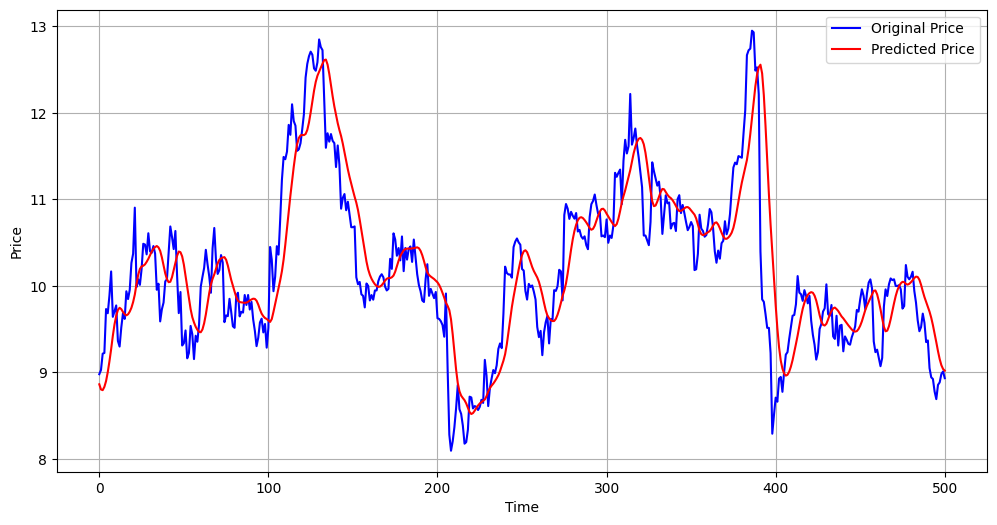

In [111]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred1, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [112]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred1

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.6953429413232824
